# Investigating TMBD dataset

## Problem:
How to maximise profits for movies

## Approach
- Extract data
- Basic exploration
- Cleaning data
- Exploratory data analysis
- Machine learning
- Conclusions
- Limitations

## Questions:
>    1. What are the most popular/top earning movies and what is their correlation?
>    2. How does popularity, runtime, budget and average votes affect profit?
>    3. Which month has the highest profit?
>    4. Most frequent cast? 
>    5. Most popular genre?
>    6. Which year has the highest profit?
>    7. What kinds of properties are associated with movies that have high profits?
    

In [68]:
# Basic libraries for using APIs
import requests
import json

In [69]:
# Basic Libraries for data visualization
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import scipy
sb.set() # set the default Seaborn style for graphics

# Useful links
1. https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset
2. https://www.themoviedb.org/documentation/api/discover
3. https://pandas.pydata.org/docs/user_guide/merging.html
4. https://developers.themoviedb.org/3/discover/movie-discover
5. https://rstudio-pubs-static.s3.amazonaws.com/384914_7bee8325659440ab9db1b3de36c37343.html

In [70]:
df = pd.read_excel("25variables.xlsx", index_col=0)
response = requests.get("https://api.themoviedb.org/3/movie/299534?api_key=31640ced603b9ef09bc66eba05aa136f")
headerlist=[]

# Renaming columns
for headers in response.json():
    headerlist.append(headers)
print(headerlist)
df = df.rename(columns={i:headerlist[i] for i in range(len(headerlist))})
df.head()

['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534.0,tt4154796,en,Avengers: Endgame,...,2019-04-24,2.797801e+09,181.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Part of the journey is the end.,Avengers: Endgame,0.0,8.3,17827.0
1,False,/AmHOQ7rpHwiaUMRjKXztnauSJb7.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995.0,tt0499549,en,Avatar,...,2009-12-10,2.787965e+09,162.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the World of Pandora.,Avatar,0.0,7.5,23198.0
2,False,/6VmFqApQRyZZzmiGOQq2C92jyvH.jpg,NaN,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,597.0,tt0120338,en,Titanic,...,1997-11-18,2.187464e+09,194.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,0.0,7.9,18997.0
3,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607.0,tt2488496,en,Star Wars: The Force Awakens,...,2015-12-15,2.068224e+09,136.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,0.0,7.4,15684.0
4,False,/lmZFxXgJE3vgrciwuDib0N8CfQo.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536.0,tt4154756,en,Avengers: Infinity War,...,2018-04-25,2.046240e+09,149.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,An entire universe. Once and for all.,Avengers: Infinity War,0.0,8.3,21511.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  10000 non-null  bool   
 1   backdrop_path          9158 non-null   object 
 2   belongs_to_collection  2148 non-null   object 
 3   budget                 9991 non-null   float64
 4   genres                 9991 non-null   object 
 5   homepage               3143 non-null   object 
 6   id                     9991 non-null   float64
 7   imdb_id                9861 non-null   object 
 8   original_language      9991 non-null   object 
 9   original_title         9991 non-null   object 
 10  overview               9864 non-null   object 
 11  popularity             9991 non-null   float64
 12  poster_path            9865 non-null   object 
 13  production_companies   9991 non-null   object 
 14  production_countries   9991 non-null   object 
 15  rel

In [72]:
df.describe()

,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,9.991000e+03,9991.000000,9991.000000,9.991000e+03,9966.000000,9991.0,9991.000000,9991.000000
mean,2.024896e+07,129708.913422,17.803887,6.335092e+07,107.954947,0.0,6.260945,1164.027525
std,3.692121e+07,177224.129008,87.717613,1.472983e+08,25.412666,0.0,1.300374,2383.958577
min,0.000000e+00,5.000000,0.600000,0.000000e+00,0.000000,0.0,0.000000,0.000000
25%,0.000000e+00,10679.500000,6.345000,2.972592e+06,94.000000,0.0,5.800000,52.000000
50%,5.100000e+06,34760.000000,11.011000,1.329037e+07,105.000000,0.0,6.400000,278.000000
75%,2.500000e+07,212773.500000,16.734000,5.479311e+07,120.000000,0.0,7.000000,1095.000000
max,9.653130e+08,815352.000000,7618.712000,2.797801e+09,465.000000,0.0,10.000000,28821.000000


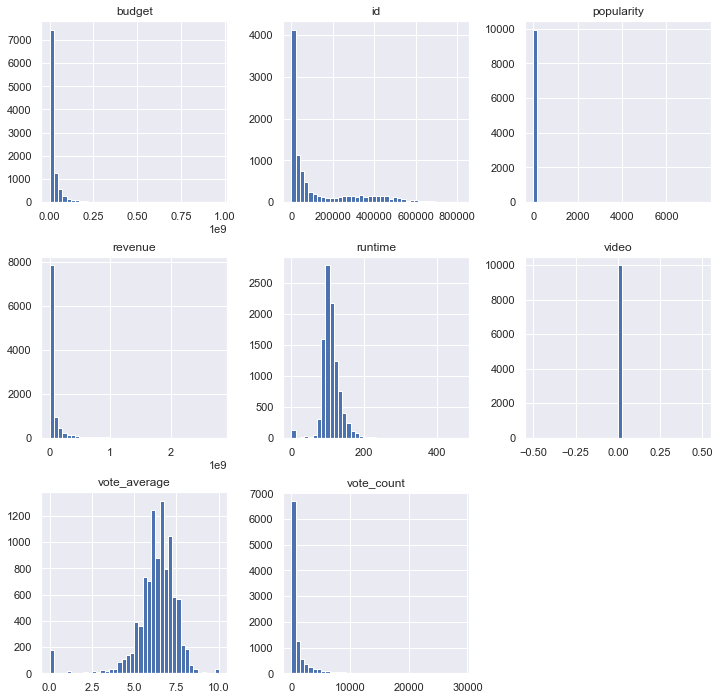

In [73]:
# Overall distribution of data
df.hist(figsize = (12,12), bins=40);

### Observation:
Popularity is not well represented. We can identify the reasons for this by looking at TMDB's popularity model.

For movies:
> - Number of votes for the day
> - Number of views for the day
> - Number of users who marked it as a "favourite" for the day
> - Number of users who added it to their "watchlist" for the day
> - Release date
> - Number of total votes
> - Previous days score

source: https://developers.themoviedb.org/3/getting-started/popularity

We can observe that popularity depends on several daily factors. This means that the popularity metric can be interpreted as "most popular movie of the day". Consequently, this means that the data is skewed towards recently released movies. As such, it cannot be used to determine actual popularity of movies as older movies are less likely to be "viewed/voted on/marked as favourite /added to watchlist" and so on each day. 

Therefore, for this project, **we will use vote count as the measure of popularity**. This is because the higher the vote count on a movie, the more views the movie must have had, resulting in higher popularity.

We want to show that vote count is not a dominant factor in calculating popularity, even though it should if we want all-time popularity values, not just daily popularity values.

In [74]:
# Sort the data by popularity
sorted_pop = pd.DataFrame(df['popularity'].sort_values(ascending=False)[:10])

# Sort the data by vote count
sorted_vc = pd.DataFrame(df['vote_count'].sort_values(ascending=False)[:10])

sorted_pop.head(10)

,popularity
373,7618.712
2458,2112.937
2209,1374.650
3781,1329.927
1002,1276.177
1233,820.304
2339,772.928
3957,768.496
3653,684.674
2431,647.487


In [75]:
sorted_vc.head(10)

,vote_count
81,28821.0
133,25518.0
42,24858.0
98,24724.0
7,24450.0
1,23198.0
100,22292.0
4,21511.0
1609,21502.0
746,20916.0


### Observation:
The 10 movies with highest popularity and vote count respectively are completely different. In fact, the most popular movie does not even appear in the list of 10 movies with the highest vote count and vice versa.

# Data cleaning

In [76]:
# Remove any unecessary columns
df.drop(['homepage', 'imdb_id', 'overview', 'tagline', 'backdrop_path','poster_path','video', 'status', 'popularity'],axis =1,inplace = True)

# Replace all NULL values with 0
df=df.fillna(0) 

# Drop all duplicates
df.drop_duplicates(inplace=True)

Revenue and budget are present in the dataset but not profit. Since profit is simply $revenue - budget$, we can apply this formula to determine the profit of each movie.

In [77]:
#Drop rows with zero values in budget and revenue

df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.dropna(inplace =True)

In [78]:
df['profit'] = df['revenue'] - df['budget']
df['profit'] = df['profit'].astype(int) #was revenue

In [79]:
#The release dates in the dataset are in string format. Thus we need to convert them into datetime format.
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2019-04-24
1   2009-12-10
2   1997-11-18
3   2015-12-15
4   2018-04-25
Name: release_date, dtype: datetime64[ns]

In [80]:
#Rename vote_count as popularity since we are using it as the popularity  metric.
df = df.rename(columns={'vote_count': 'popularity'})

In [81]:
# Replace all NULL values with 0
df=df.fillna(0) 

# Drop all duplicates
df.drop_duplicates(inplace=True)

In [82]:
df.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
original_title           0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
title                    0
vote_average             0
popularity               0
profit                   0
dtype: int64

# Exploratory data analysis

In [83]:
df.describe()

,budget,id,revenue,runtime,vote_average,popularity,profit
count,7.128000e+03,7128.000000,7.128000e+03,7128.000000,7128.000000,7128.000000,7.128000e+03
mean,2.838206e+07,110616.167088,8.353324e+07,110.591049,6.341260,1549.980499,5.384818e+07
std,4.098674e+07,162639.582822,1.686969e+08,24.705281,1.179831,2717.152103,1.416729e+08
min,1.000000e+00,5.000000,3.343190e+05,0.000000,0.000000,0.000000,-2.147484e+09
25%,4.000000e+06,9690.000000,5.548607e+06,95.000000,5.900000,110.000000,-5.862412e+05
50%,1.400000e+07,23944.000000,2.334833e+07,107.000000,6.500000,526.000000,8.094852e+06
75%,3.500000e+07,152034.750000,8.520774e+07,122.000000,7.000000,1680.250000,5.162266e+07
max,9.653130e+08,815352.000000,2.797801e+09,339.000000,10.000000,28821.000000,1.987464e+09


Since our objective is to maximise profits for movies, let's take a look at the distribution of profits for movies.

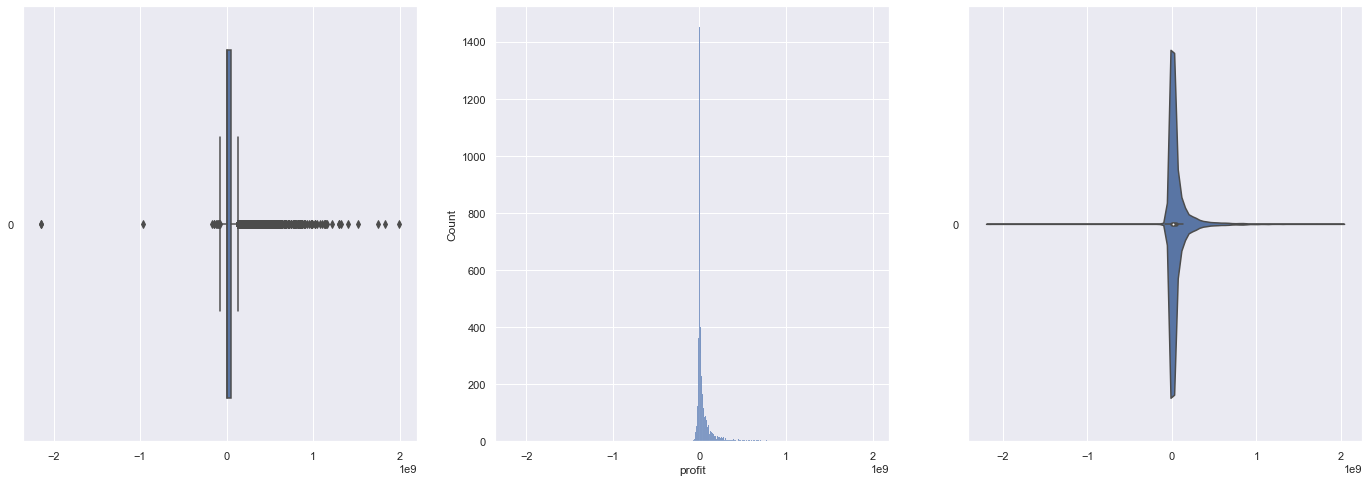

In [84]:
f,axes=plt.subplots(1,3,figsize=(24,8))
sb.boxplot(data=df["profit"],orient='h',ax=axes[0])
sb.histplot(data=df["profit"],ax=axes[1])
sb.violinplot(data=df["profit"],orient='h',ax=axes[2])
plt.show()

### 1. What are the most popular/top earning movies and what is their correlation?

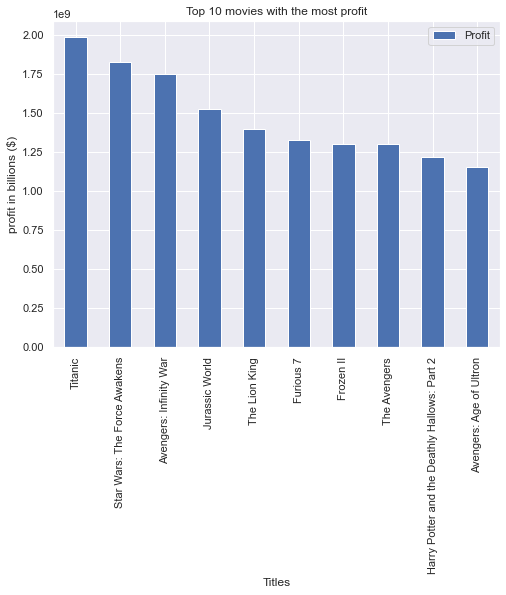

In [85]:
# Sort the data by profit
sorted_profit = df['profit'].sort_values(ascending=False)[:10]

# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
high_profit=pd.DataFrame()
titles=[]
profit=[]

# Fill the vallues from raw data to the lists.
for i in sorted_profit.index:
    titles.append(df.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
high_profit['Titles']=titles
high_profit['Profit']=profit
high_profit.set_index('Titles',inplace=True)

# Plot
high_profit.plot(kind ='bar',figsize=(8,6))
plt.title('Top 10 movies with the most profit');
plt.ylabel('profit in billions ($)');

# Displaying the top 5 most popular movies

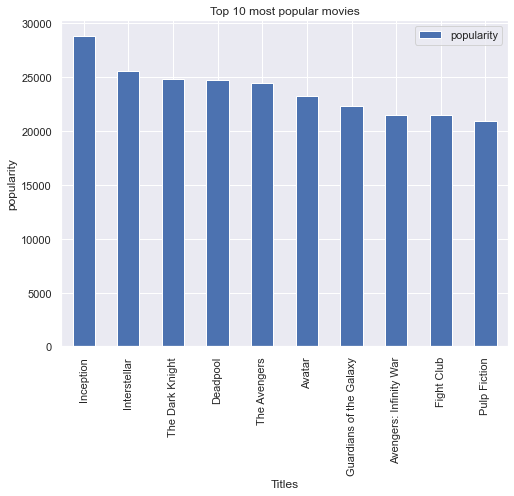

In [86]:
# Sort the data by popularity (vote count)

sorted_pop = df['popularity'].sort_values(ascending=False)[:10]

# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
high_pop=pd.DataFrame()
titles=[]
pop=[]

# Fill the vallues from raw data to the lists.
for i in sorted_pop.index:
    titles.append(df.loc[i,'original_title'])
    pop.append(sorted_pop.loc[i])
high_pop['Titles']=titles
high_pop['popularity']=pop
high_pop.set_index('Titles',inplace=True)

# Plot
high_pop.plot(kind ='bar',figsize=(8,6))
plt.title('Top 10 most popular movies');
plt.ylabel('popularity');

# Displaying the top 5 most popular movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 0 to 9997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   profit      7128 non-null   int32  
 1   popularity  7128 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 333.2 KB


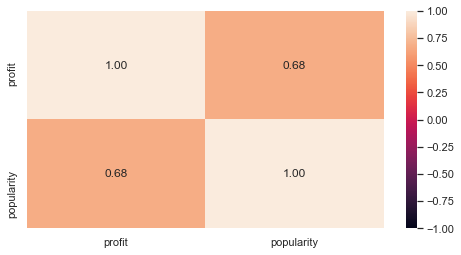

In [87]:
# Correlation between Response and the Predictors
corr_df = pd.concat([df['profit'], df['popularity']], axis = 1).reindex(df['profit'].index)

f = plt.figure(figsize=(8, 4))
sb.heatmap(corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
corr_df.info()

Correlation Between Popularity And Profit :  0.6805609584635275


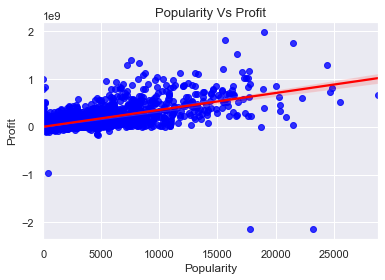

In [88]:
p = ax = sb.regplot(x=df['popularity'], y=df['profit'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#set the title and labels of the figure
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#set the figure size
sb.set(rc={'figure.figsize':(6,4)})
sb.set_style("whitegrid")

#change zero into NAN in budget and revenue column for the exact calculation.
df['popularity'] = df['popularity'].replace(0,np.NAN)
df['profit'] = df['profit'].replace(0,np.NAN)

data_corr = df.corr()
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','profit'])

### Observation:
There is high correlation between popularity and profit.

### Linear regression line:
> Regression Model : Profit = $a$ $\times$ Popularity + $b$

In [89]:
# Ensuring that there are no NULL values left.

# Replace all NULL values with 0
df=df.fillna(0) 

# Drop all duplicates
df.drop_duplicates(inplace=True)

In [90]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df[["popularity"]])
y = pd.DataFrame(df[["profit"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (5346, 1) (5346, 1)
Test Set  : (1782, 1) (1782, 1)


In [91]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

In [92]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-709812.65518356]
Coefficients of Regression 	: a =  [[35229.8186387]]



,Predictors,Coefficients
0,popularity,35229.818639


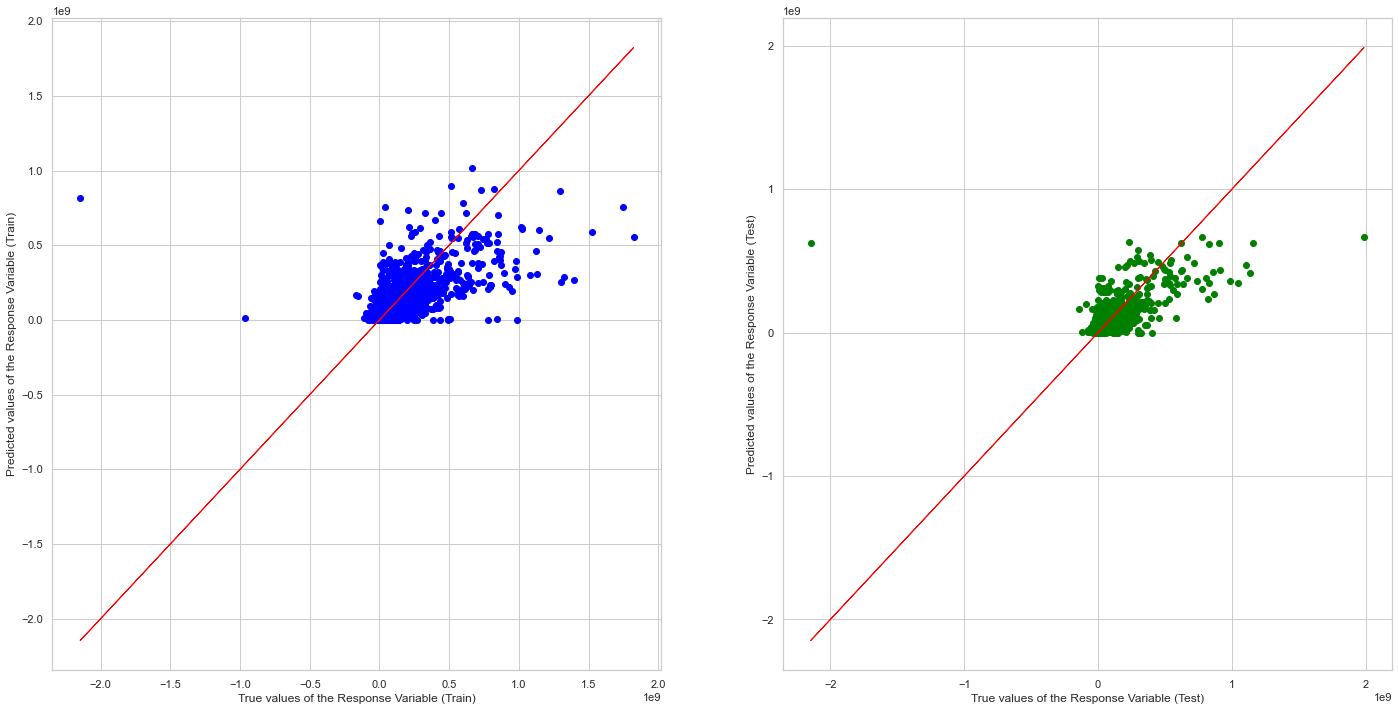

In [93]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color = "red")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color = "red")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### Observations
Although profits and popularity have a high correlation, it is not high enough to construct a linear regression model to accurately predict profits based on popularity. Hence we should use multi-variate linear regression with other factors such as runtime and average votes to predict popularity. 

# Multi-variate linear regression

### 2. How does popularity, runtime, budget and average votes affect profit?

In [94]:
# Extract Response and Predictors
y = pd.DataFrame(df["profit"])
X = pd.DataFrame(df[["popularity", "vote_average", "runtime", "budget"]])

In [95]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (5346, 1) (5346, 4)
Test Set  : (1782, 1) (1782, 4)


<AxesSubplot:>

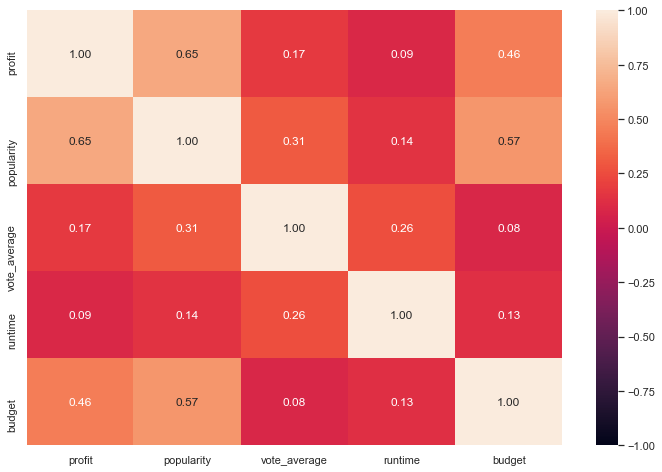

In [96]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

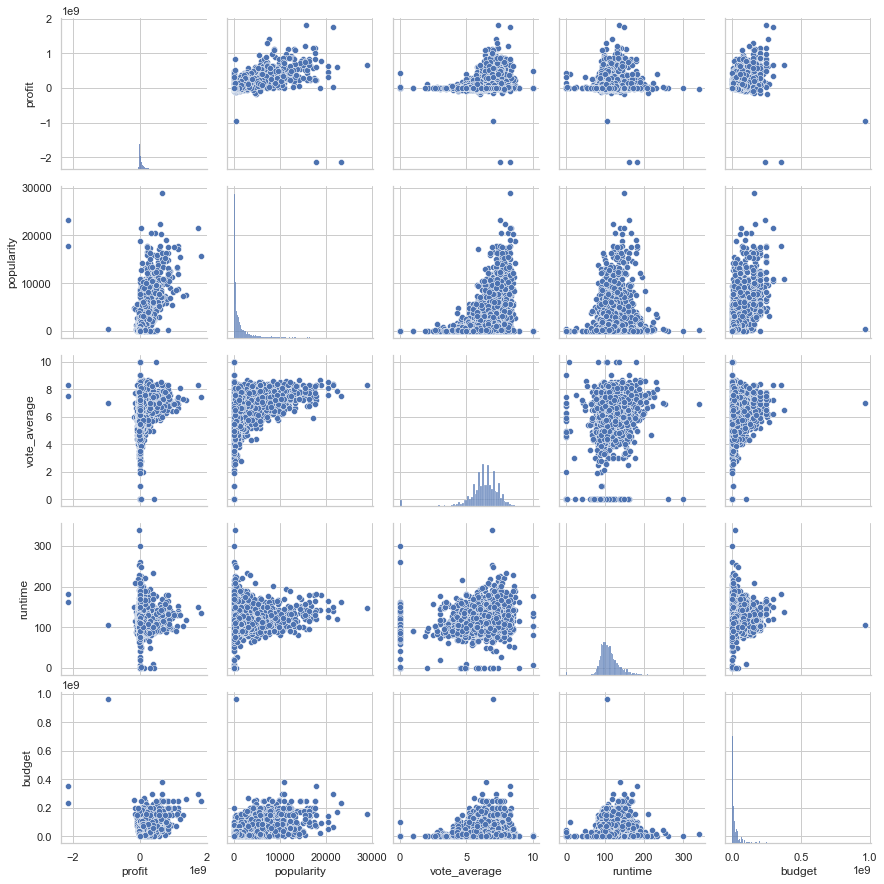

In [97]:
sb.pairplot(data = trainDF)

### Observation:
Budget vs profit, budget vs popularity and profit vs popularity have moderate correlation. Every other pair of predictor/predictor or predictor/response variables have a poor correlation.

Intercept of Regression 	: b =  [11026295.86363104]
Coefficients of Regression 	: a =  [[ 3.08026858e+04 -2.11757854e+06 -3.99667770e+04  4.25078171e-01]]



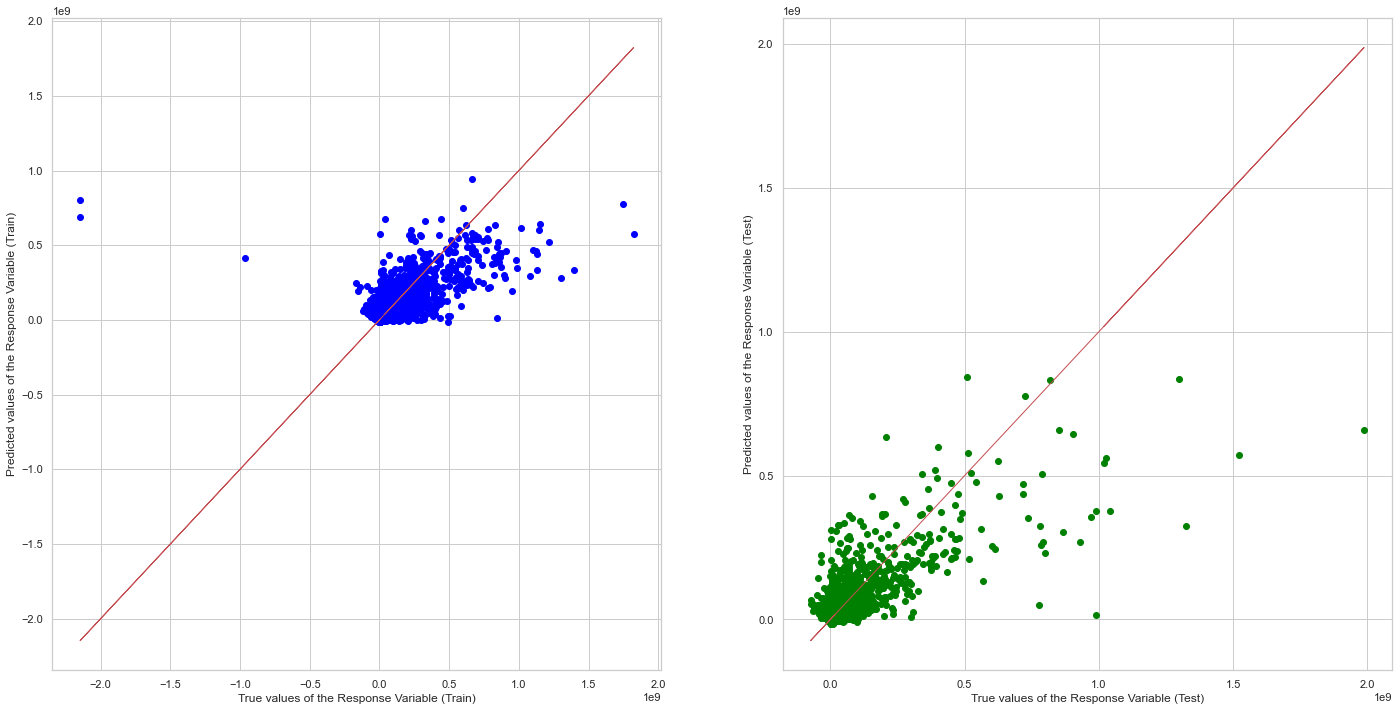

In [98]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Response Variable : **Profit**     
Predictor Feature : **Popularity, Vote_average, Runtime, Budget**      

> Regression Model : Profit = $a_1$ $\times$ Popularity + $a_2$ $\times$ Vote_average + $a_3$ $\times$ Runtime + $a_4$ $\times$ Budget + $b$   

In [99]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43714563468348844
Mean Squared Error (MSE) 	: 1.0931589794036682e+16

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5699754976425987
Mean Squared Error (MSE) 	: 9442838214268130.0



### Observation:
Although we have constructed a multi-variate linear regression model, it will probably not generate very accurate profit values. This is because the correlation between numerous predictors/responses are low. Consequently, the explained variance is moderate and the mean squared error is extremely high.

Overall, it is difficult to predict the profits of movies with continuous values. Therefore, we should focus on discrete values to determine if a movie will make high profits.

### 3. Which month has the highest profit?

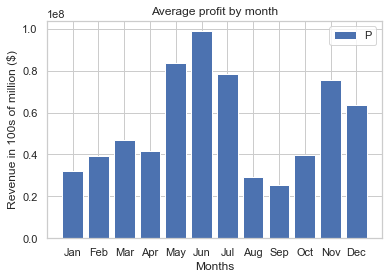

In [100]:
df['release_month']=df['release_date'].dt.month

profit_by_month = df.groupby('release_month')['profit'].mean()

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.bar(np.arange(0, 12), profit_by_month, tick_label = months, )
plt.title('Average profit by month');
plt.ylabel('Revenue in 100s of million ($)');
plt.xlabel('Months');
plt.legend('Profit');

### Observation:
Historically, the highest profit is earned in June, followed by May and then July.

###  4. Most frequent cast? 

Actors that are good at their job might be more popular, so if we cast the most popular actors, they might be able to generate more profits.

In [101]:
# Retrieving dataset of actors using API.
topactors = requests.get("https://api.themoviedb.org/3/person/popular?api_key=31640ced603b9ef09bc66eba05aa136f")
actors=pd.DataFrame(topactors.json()['results'])

# Deleting unecessary columns.
actors.drop(['adult', 'known_for','profile_path'],axis =1,inplace = True)
actors['gender']=actors['gender'].replace([1,2],['female','male'])
actors.head(10)

,gender,id,known_for_department,name,popularity
0,female,1245,Acting,Scarlett Johansson,48.125
1,female,26723,Acting,Katheryn Winnick,43.919
2,female,1356210,Acting,Millie Bobby Brown,32.572
3,female,56734,Acting,Chloë Grace Moretz,32.948
4,male,6384,Acting,Keanu Reeves,50.812
5,male,60898,Acting,Sebastian Stan,33.272
6,male,73968,Acting,Henry Cavill,37.120
7,female,935,Acting,Connie Nielsen,31.337
8,male,287,Acting,Brad Pitt,28.701
9,male,976,Acting,Jason Statham,35.066


Text(0, 0.5, 'Popularity')

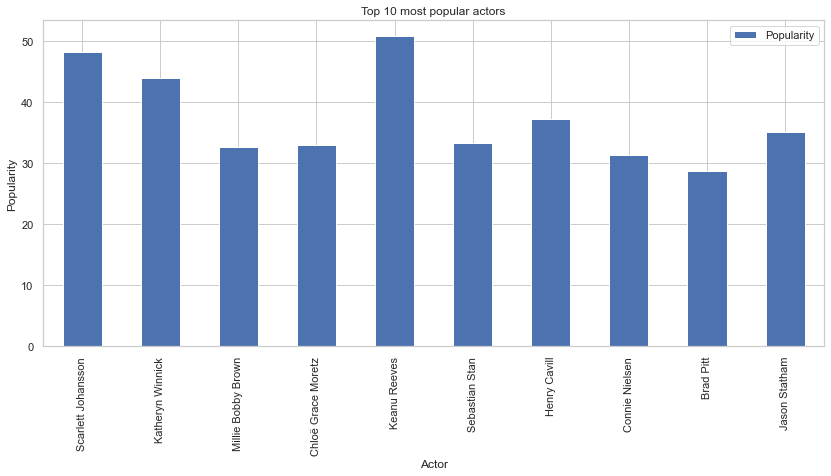

In [102]:
actorlist=[]
actorpoplist=[]
for i in range(10):
    actorlist.append(actors['name'][i])
    actorpoplist.append(actors['popularity'][i])

# Plot actors and their popularity
actorpop=pd.DataFrame()
actorpop['Actor']=actorlist
actorpop['Popularity']=actorpoplist
actorpop.set_index('Actor',inplace=True)
actorpop.plot(kind='bar',figsize=(14,6))
plt.title('Top 10 most popular actors')
plt.ylabel('Popularity')

### Observations:
Actors have differing popularity. Hence, casting popular actors will likely result in increased views and thus revenue of a movie.

### 5. Most popular genre?

What genres are movies commonly in? Which genres have the most profits?

In [103]:
genre_list = requests.get("https://api.themoviedb.org/3/genre/movie/list?api_key=31640ced603b9ef09bc66eba05aa136f&language=en-US")
genre_list = genre_list.json()
gl = pd.DataFrame(genre_list)
display(gl) #print full dataframe

,genres
0,"{'id': 28, 'name': 'Action'}"
1,"{'id': 12, 'name': 'Adventure'}"
2,"{'id': 16, 'name': 'Animation'}"
3,"{'id': 35, 'name': 'Comedy'}"
4,"{'id': 80, 'name': 'Crime'}"
5,"{'id': 99, 'name': 'Documentary'}"
6,"{'id': 18, 'name': 'Drama'}"
7,"{'id': 10751, 'name': 'Family'}"
8,"{'id': 14, 'name': 'Fantasy'}"
9,"{'id': 36, 'name': 'History'}"


In [104]:
#genre_list=gl.to_numpy().tolist()
genre_idlist=[28,12,16,35,80,99,18,10751,14,36,27,10402,9648,10749,878,10770,53,10752,37]

In [105]:
title=pd.DataFrame(df['original_title'])
genrelist=pd.DataFrame(df['genres'])
genres=pd.concat([title,genrelist],axis=1)
genres['profit']=df['profit']

genreidlist=[[] for i in genres['genres']] #each row will have a list of genre ids
for i in range(len(genres['genres'])):
    for j in range(len(genre_idlist)):
        if (str(genre_idlist[j])) in genres.iloc[i]['genres']:
            genreidlist[i].append(genre_idlist[j])


In [106]:
genres['genre_ids']=genreidlist

In [107]:
genrelist=[] #actual genre list
genrenamelist=[] #list containing names
for i in range(len(genre_list['genres'])):
    genrelist.append(str(genre_list['genres'][i]['id']))
    genrenamelist.append(str(genre_list['genres'][i]['name']))
#print(genrelist)
#print(genrenamelist)
genrecol=[[] for i in range(len(genrelist))] #each list in the list is a genre. 1 = True, 0 = False

for i in range(len(genres)):
    for j in range(len(genrelist)):
        if(int(genrelist[j]) in genres.iloc[i]['genre_ids']):
            genrecol[j].append(1)
        else:
            genrecol[j].append(0)
print('done')

done


In [108]:
for i in range(len(genrelist)):
    genres[genrelist[i]]=genrecol[i]

for i in range(len(genrelist)):
    genres.rename(columns={genrelist[i]:genrenamelist[i]},inplace=True)

genres.head()

,original_title,genres,profit,genre_ids,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Avengers: Endgame,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",-2.147484e+09,"[28, 12, 878]",1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",-2.147484e+09,"[28, 12, 14, 878]",1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Titanic,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1.987464e+09,"[18, 10749]",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Star Wars: The Force Awakens,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1.823224e+09,"[28, 12, 14, 878]",1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Avengers: Infinity War,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1.746240e+09,"[28, 12, 878]",1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [109]:
print("Counts for each genre--")
genrecounts=[]
for i in range(len(genrenamelist)):
    print(genrenamelist[i]+" : "+str(genres[genrenamelist[i]].value_counts()[1]))
    genrecounts.append(genres[genrenamelist[i]].value_counts()[1])

Counts for each genre--
Action : 1838
Adventure : 1236
Animation : 394
Comedy : 2510
Crime : 1093
Documentary : 81
Drama : 3345
Family : 768
Fantasy : 699
History : 365
Horror : 758
Music : 238
Mystery : 563
Romance : 1345
Science Fiction : 788
TV Movie : 8
Thriller : 1805
War : 274
Western : 111


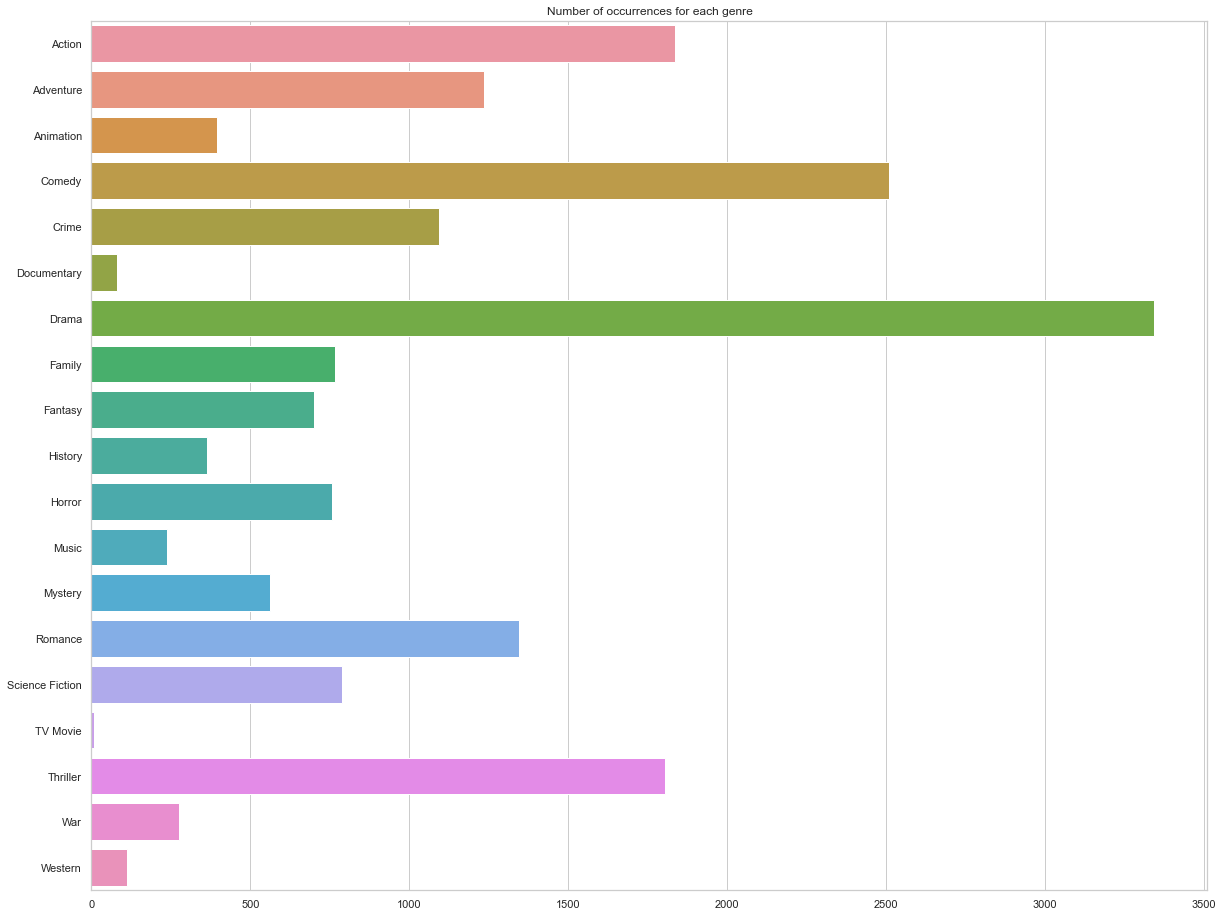

In [110]:
fig, ax = plt.subplots(figsize=(20, 16))
sb.barplot(y=genrenamelist,x=genrecounts,orient='h')
plt.title('Number of occurrences for each genre')
plt.show()

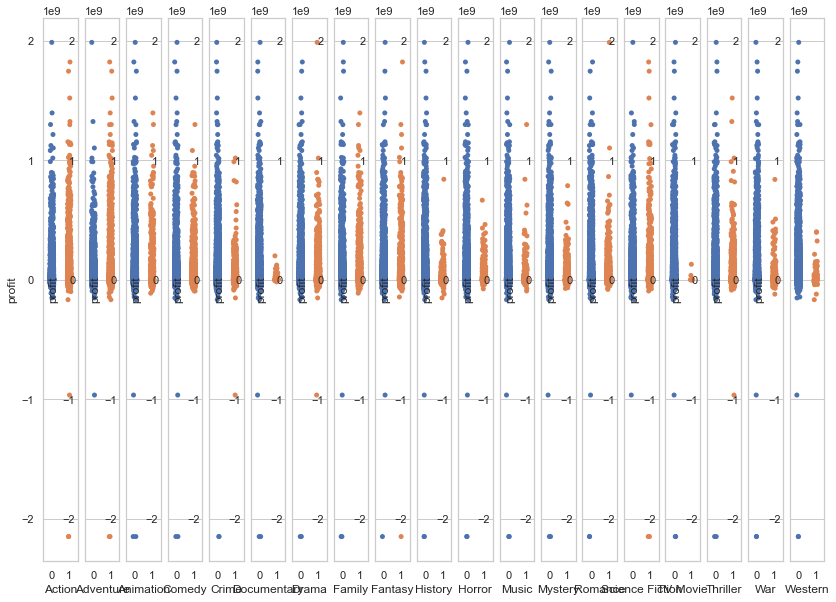

In [111]:
fig, axs = plt.subplots(1,19,figsize=(14,10))

for i in range(len(genrenamelist)):
    sb.stripplot(data=genres,y="profit",x=genrenamelist[i],ax=axs[i])

The graphs above show a distinct difference in distribution of profits against different genres.
At first glance, most genres have fairly even distribution ratios across popularity, but some genres seem to have a lower chance of having high popularity, such as Documentary, History, Horror, Music, Mystery, TV Movie, War, Western.
This might partly be because there are fewer data points for these genres.

<AxesSubplot:>

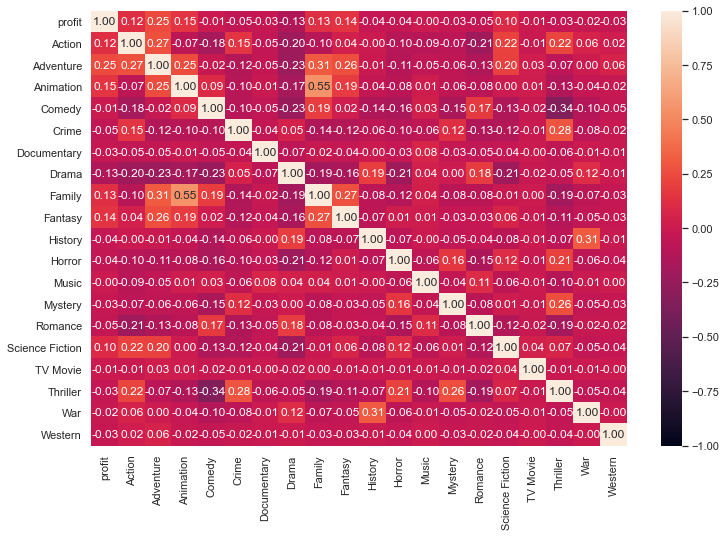

In [113]:
#genres.corr()
f = plt.figure(figsize=(12, 8))
sb.heatmap(genres.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

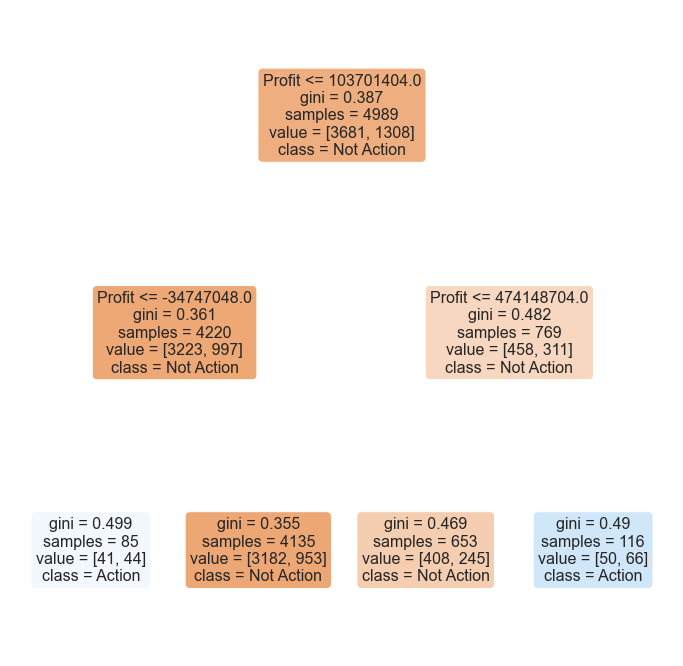

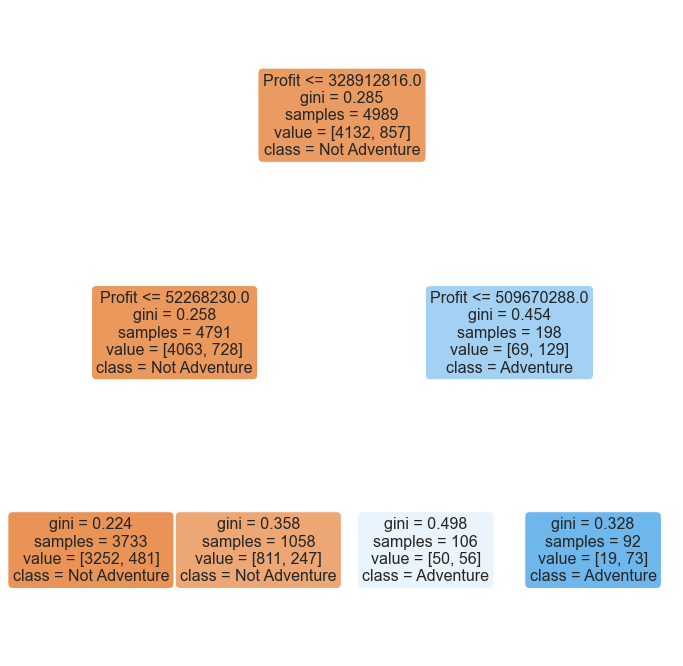

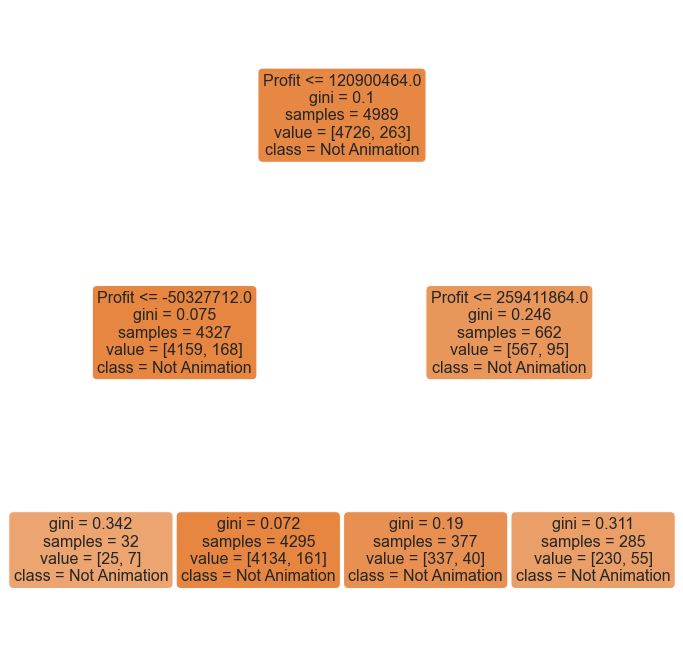

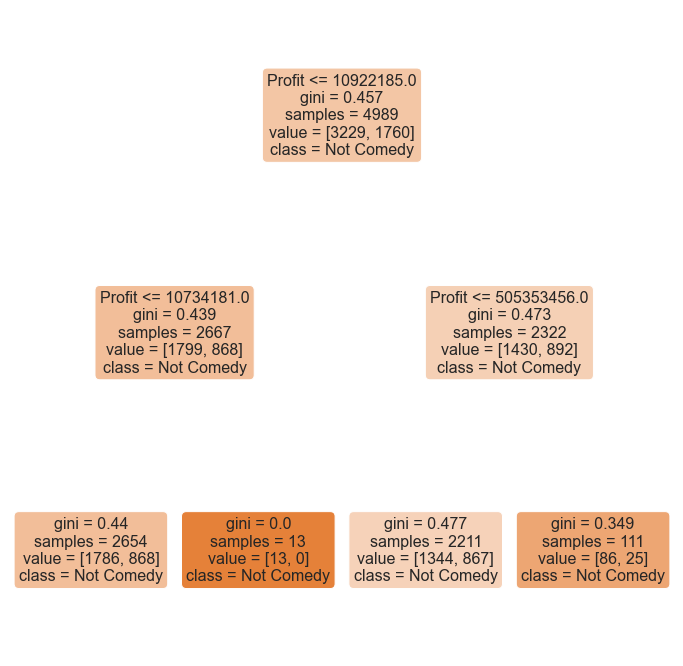

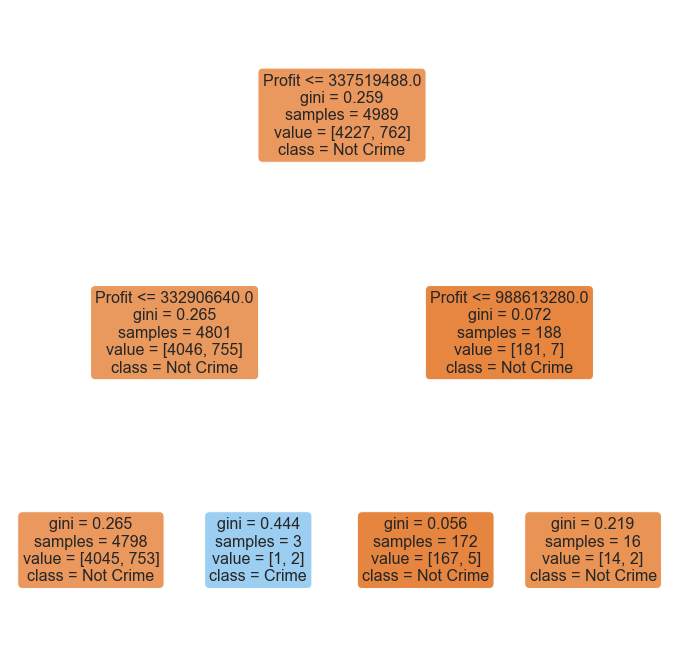

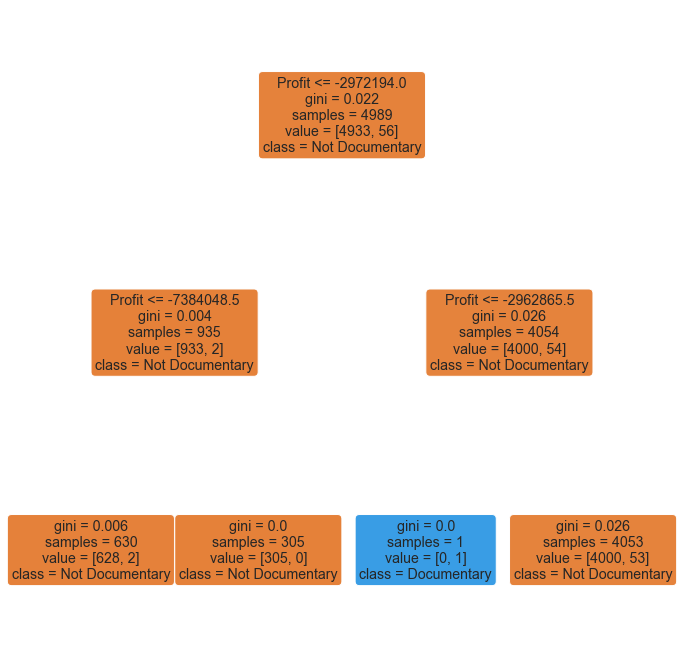

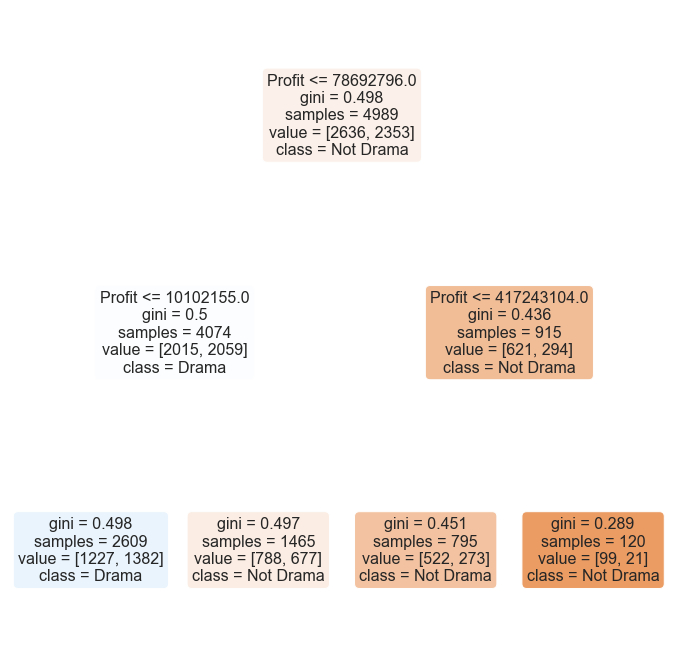

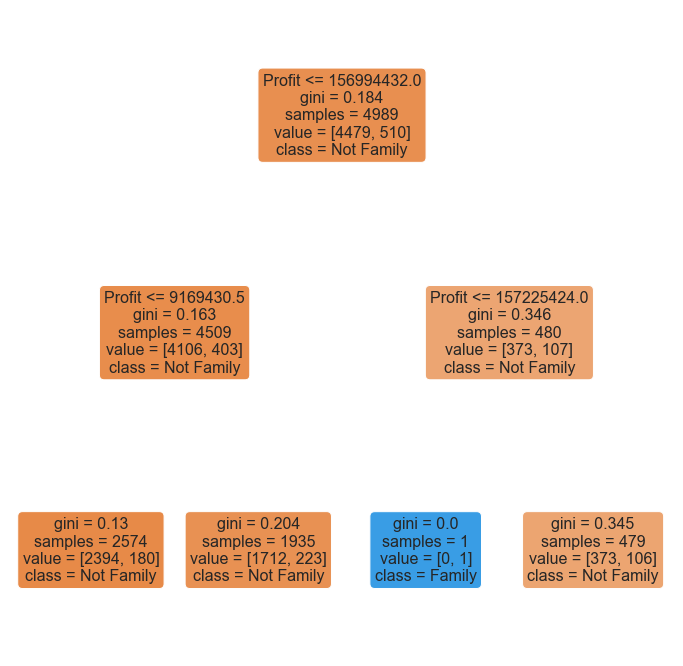

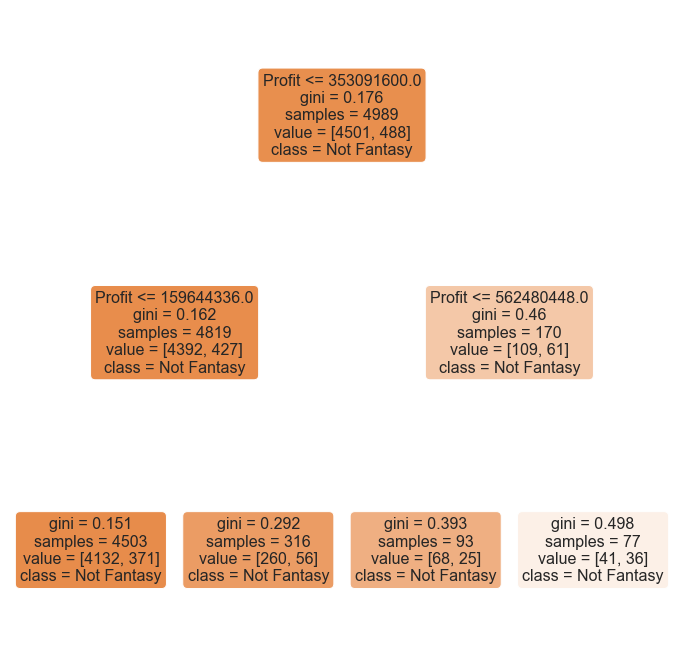

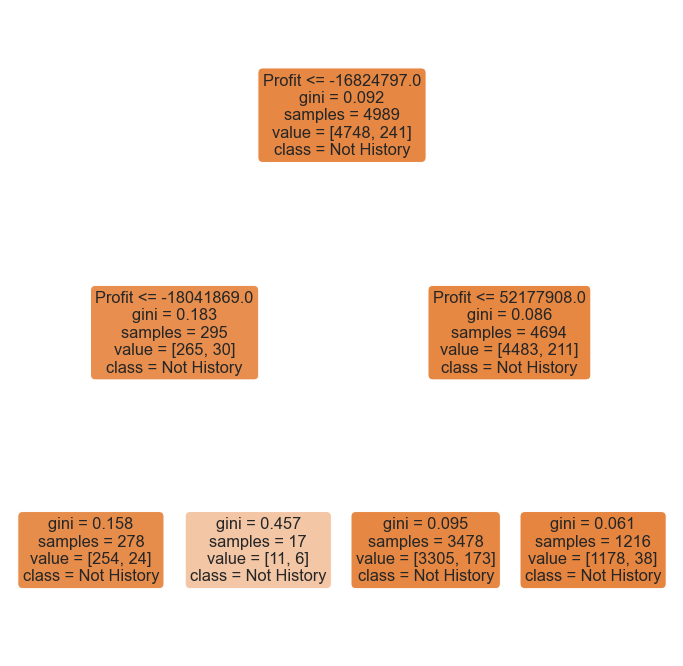

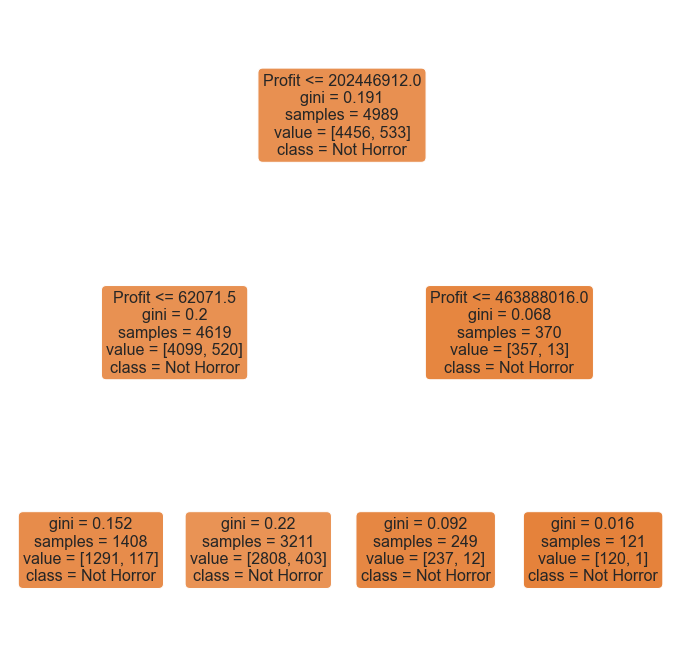

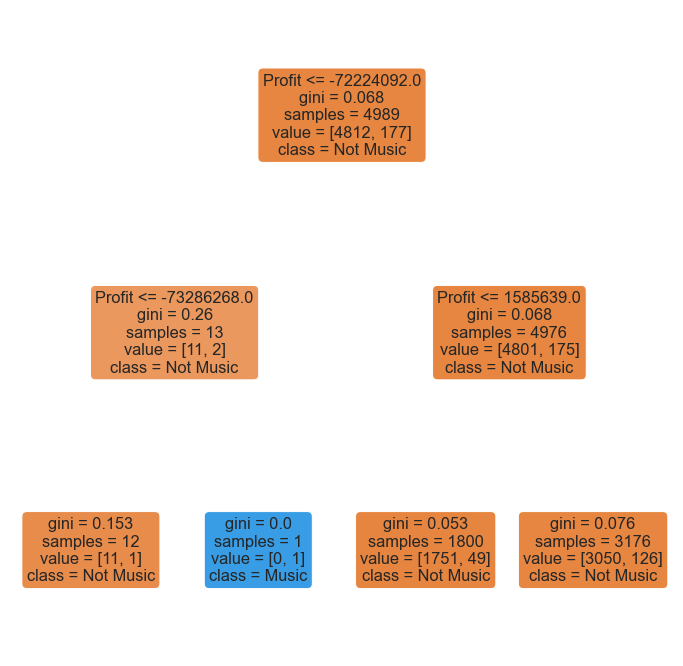

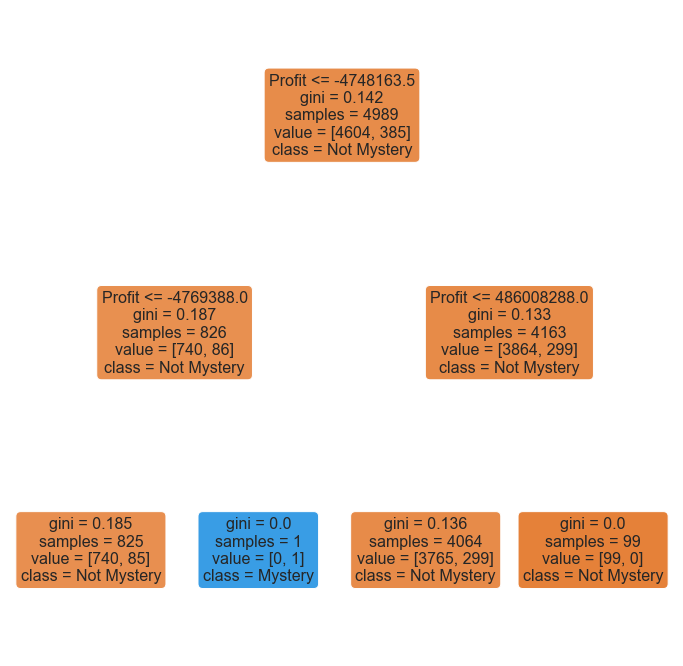

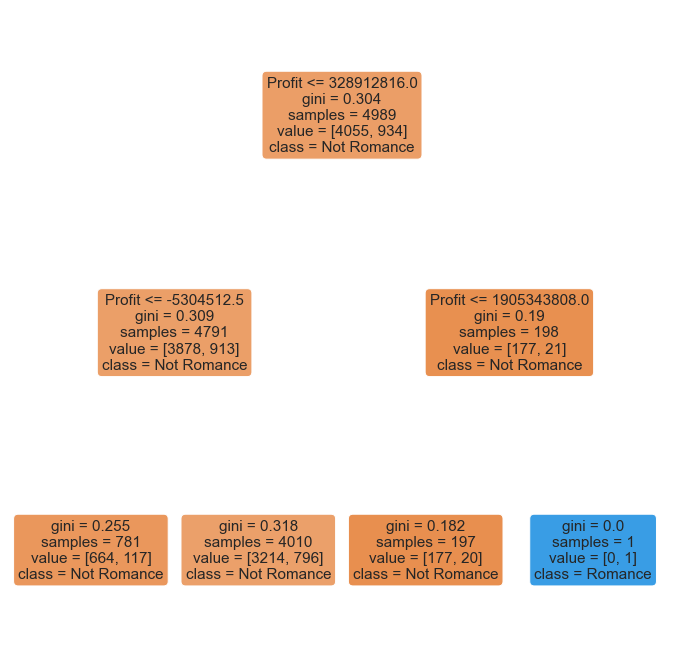

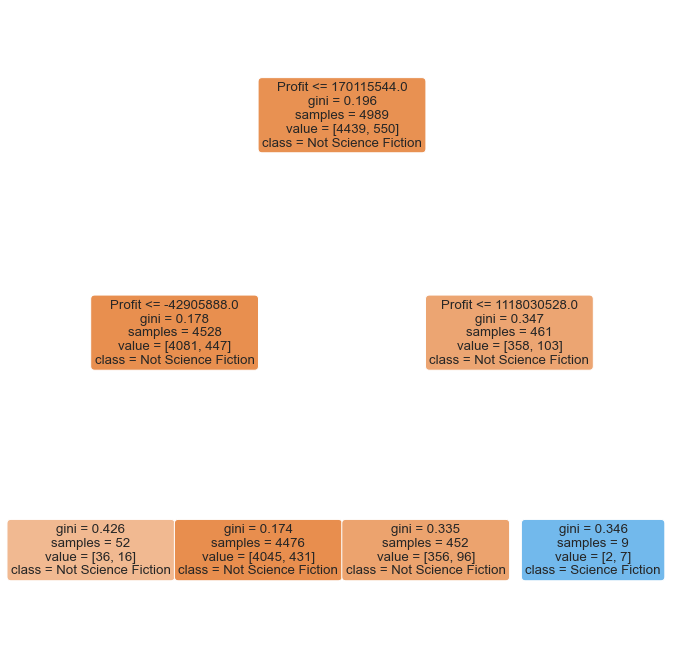

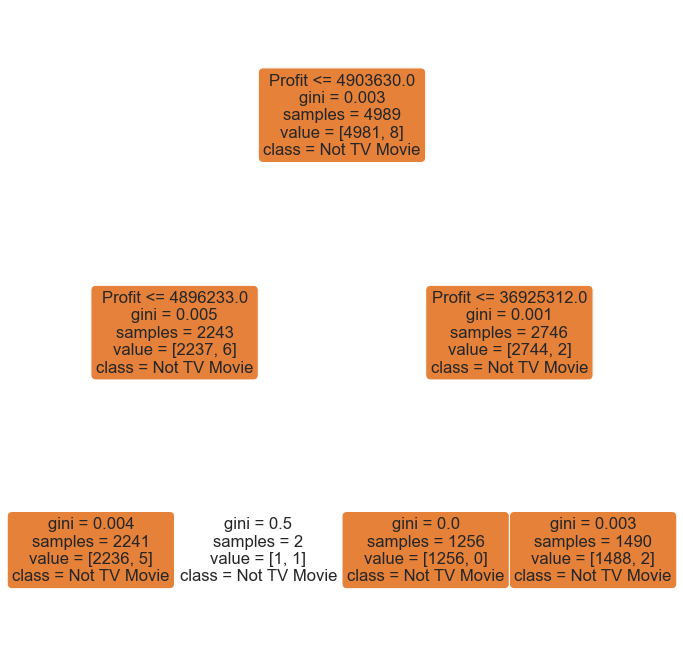

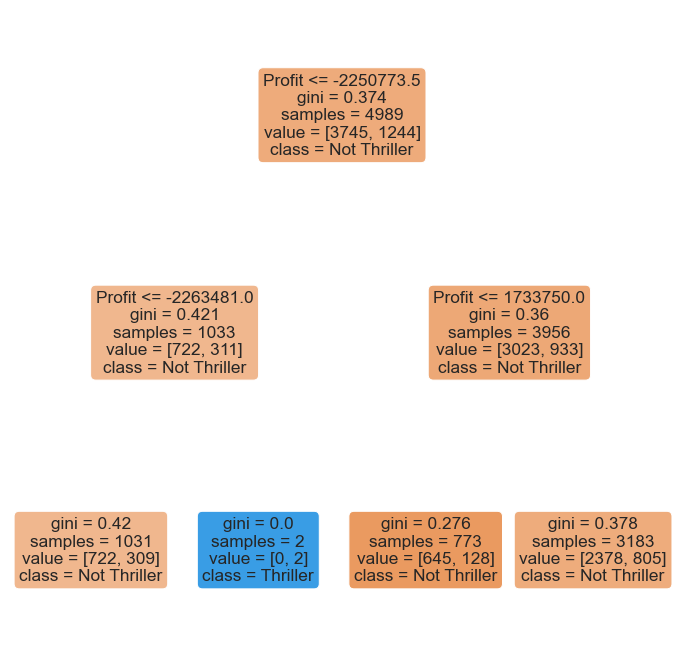

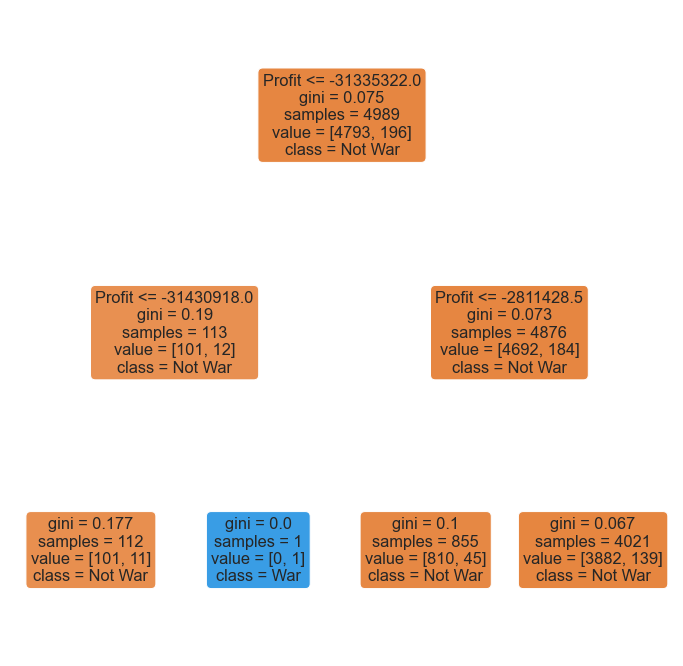

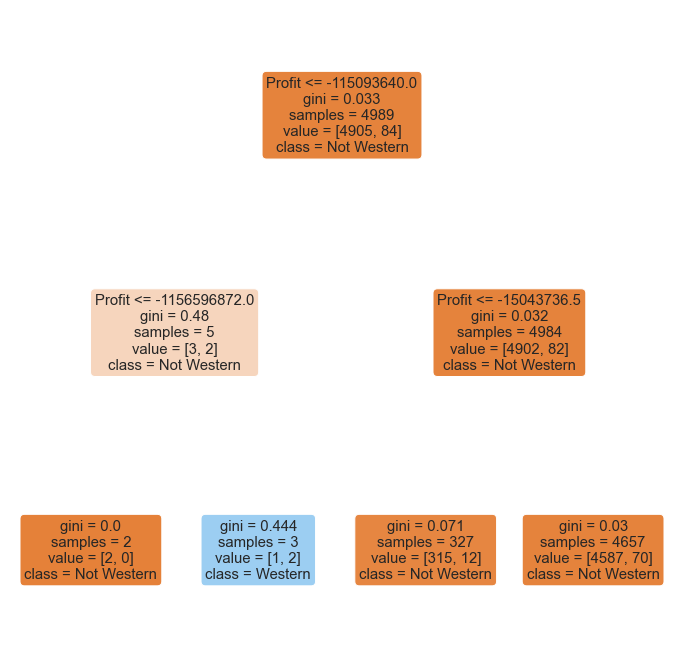

In [114]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import plot_tree

for genre in genrenamelist:
    y=pd.DataFrame(genres[genre])
    x=pd.DataFrame(genres["profit"])
    x_train,x_test,y_train,y_test=tts(x,y,test_size=(0.3))

    dt=dtc(max_depth=2)
    dt.fit(x_train,y_train)

    y_train_pred=dt.predict(x_train)
    y_test_pred=dt.predict(x_test)

    f=plt.figure(figsize=(12,12))
    plot_tree(dt,filled=True,rounded=True,feature_names=["Profit"],
             class_names=['Not '+genre,genre])
plt.show()

### 6. Which year has the highest proft?

In [115]:
#Adding release year to the dataset.
df['release_year'] = df['release_date'].dt.year
df.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,popularity,profit,release_month,release_year
0,False,"{'id': 86311, 'name': 'The Avengers Collection...",356000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534.0,en,Avengers: Endgame,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2.797801e+09,181.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Avengers: Endgame,8.3,17827.0,-2.147484e+09,4,2019
1,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995.0,en,Avatar,"[{'id': 444, 'logo_path': '/42UPdZl6B2cFXgNUAS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Avatar,7.5,23198.0,-2.147484e+09,12,2009
2,False,0,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597.0,en,Titanic,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2.187464e+09,194.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Titanic,7.9,18997.0,1.987464e+09,11,1997
3,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",140607.0,en,Star Wars: The Force Awakens,"[{'id': 1, 'logo_path': '/o86DbpburjxrqAzEDhXZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2.068224e+09,136.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Star Wars: The Force Awakens,7.4,15684.0,1.823224e+09,12,2015
4,False,"{'id': 86311, 'name': 'The Avengers Collection...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536.0,en,Avengers: Infinity War,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2.046240e+09,149.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Avengers: Infinity War,8.3,21511.0,1.746240e+09,4,2018


In [116]:
# First group total profit by each years
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.head(5)

release_year
1913     1794300.0
1914     3552000.0
1915    10900000.0
1916     3795249.0
1918     7750000.0
Name: profit, dtype: float64

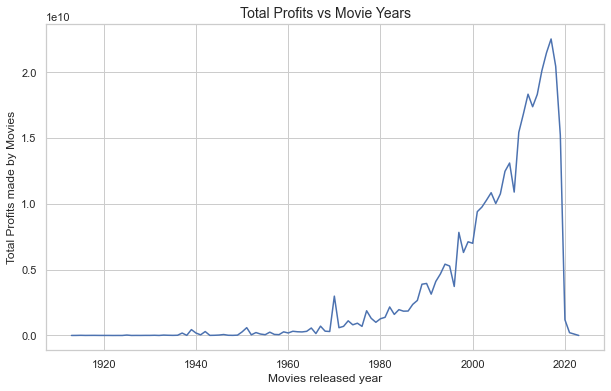

In [117]:
# plot the above query.
profit_year.plot(figsize = (10,6))
plt.xlabel('Movies released year', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Total Profits vs Movie Years', fontsize = 14);

# Conclusion

### 7. What kinds of properties are associated with movies that have high profits?

1. The more popular a movie it is, the more likely for it to have high profits.
2. Movies released between May-July and in particular June traditionally have high profits. 
3. Actors have different popularity values. Casting a popular actor might have a tangible effect on the popularity and thus profits of a movie.
4. Drama and comedy are by far the most frequent genre tagged to movies.


Thus, to maximise profits of a movie, we should:
1. Try to make it as popular as possible through advertisements and the casting of popular actors such as Keanu Reeves.
2. Release the movie in June.
3. Only make a movie if we are absolutely certain that we can at least make a profit. This is because total profits have been falling quickly since 2019. This is likely influenced by the covid-19 situation as cinemas all over the world were shut down for long periods. Thus, we should consider the above factors before we make a movie.

## Still need include genre